In [2]:
#To be run on JASMIN only, designed for the CMIP6 hackathon environment/kernel.
#Should run regardless of kernel as long as the required packages are installed, and code is run in a directory where you have write access.

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
u_control_dset = xr.open_dataset("/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/uas/gn/files/d20190410/uas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_205001-214912.nc")
#Met Office UK ESM model, control run zonal wind (u) at surface for 2050-2149 inclusive
v_control_dset = xr.open_dataset("/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/vas/gn/files/d20190410/vas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_205001-214912.nc")
#Met Office UK ESM model, control run meridional wind (v) at surface for 2050-2149 inclusive

In [4]:
u_control_months_20802100 = u_control_dset['uas'].where(u_control_dset['time.year'] > 2080, drop=True).where(u_control_dset['time.year'] <=2100, drop=True).groupby('time.month').mean(dim='time')\
.interp(lon=np.arange(360), kwargs={"fill_value": "extrapolate"}).interp(lat=np.arange(89,-90,-1))
#Narrowed down to 2081-2100 inclusive, time averaged for each month of year, interpolated on to 1x1 grid

v_control_months_20802100 = v_control_dset['vas'].where(v_control_dset['time.year'] > 2080, drop=True).where(v_control_dset['time.year'] <=2100, drop=True).groupby('time.month').mean(dim='time')\
.interp(lon=np.arange(360), kwargs={"fill_value": "extrapolate"}).interp(lat=np.arange(89,-90,-1))
#As with u

u_normalised = u_control_months_20802100/np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)
v_normalised = v_control_months_20802100/np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)
#Normalised against overall wind speed magnitude, for arrows in plots.

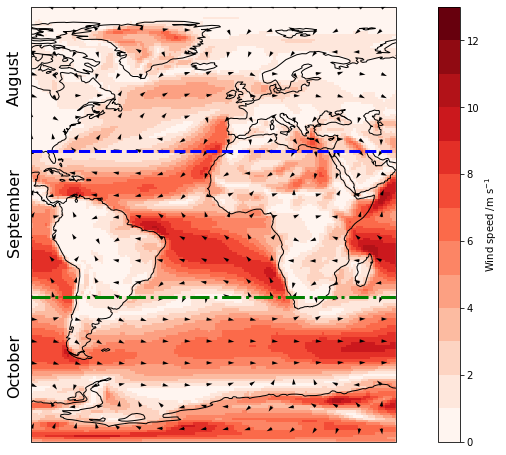

In [51]:
#Winds during southbound migration

fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0)) #PlateCarree(longitude_of_centreline)
ax.coastlines()

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] >= 30, drop=True)[7].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, cbar_kwargs={"label":"Wind speed /m s$^{-1}$"}) #September
#Line above: wind magnitude above 30 degrees for month 7 = August (as months indexed from 0 to 11)
ax.quiver(np.arange(360)[::9], np.arange(89,30,-1)[::9], u_normalised.where(u_normalised['lat'] >= 30, drop=True)[7][::9,::9], v_normalised.where(v_normalised['lat'] >= 30, drop=True)[7][::9,::9], scale=60)
#Line above: wind directions as arrows of equal length

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(np.abs(u_control_months_20802100['lat']) < 30, drop=True)[8].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #October
ax.quiver(np.arange(360)[::9], np.arange(30,-31,-1)[::9], u_normalised.where(np.abs(u_normalised['lat']) <=30, drop=True)[8][::9,::9], v_normalised.where(np.abs(v_normalised['lat']) <= 30, drop=True)[8][::9,::9], scale=60)
#As before, but for month 8 = September and between +/- 30 degrees

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] <= -30, drop=True)[9].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #November
ax.quiver(np.arange(360)[::9], np.arange(-30,-90,-1)[::9], u_normalised.where(u_normalised['lat'] <= -30, drop=True)[9][::9,::9], v_normalised.where(v_normalised['lat'] <= -30, drop=True)[9][::9,::9], scale=60)
#As before, but for month 9 = October and below -30 degrees

ax.plot([-180,180],[30,30], "b--", linewidth=3)
ax.plot([-180,180],[-30,-30], "g-.", linewidth=3)
#Shows where the map is split in to months

ax.text(-100,50, "August", rotation=90, fontsize=16)
ax.text(-100,-12, "September", rotation=90, fontsize=16)
ax.text(-100,-70, "October", rotation=90, fontsize=16)
#Month labels, first two numbers are position in degrees long, lat

fig.patch.set_facecolor('white')
#Avoids transparent backgrounds, although I'm not sure it has worked

ax.set_xlim(-90,60) #Only shows area around Atlantic. If changed, scale variable on quiver plots may need changing too.
ax.set_title("") #Removes automatically set title.
fig.savefig("./ukesm_control_southbound.png", dpi=150, bbox_inches="tight") #Saves figure; bbox_inches part removes empty space

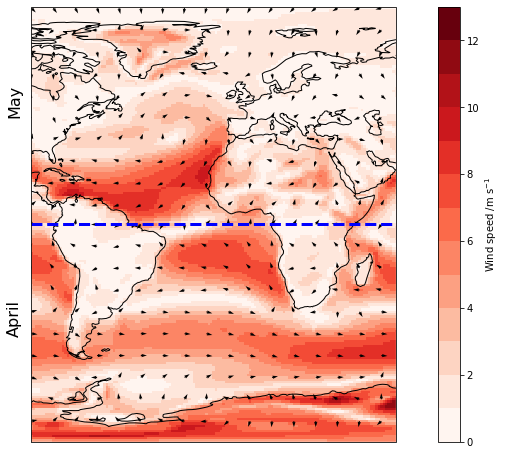

In [9]:
#Northward migration, split in to two months. See previous block for explanation of code

fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] >= 0, drop=True)[4].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, cbar_kwargs={"label":"Wind speed /m s$^{-1}$"}) #May
ax.quiver(np.arange(360)[::9], np.arange(89,0,-1)[::9], u_normalised.where(u_normalised['lat'] >= 0, drop=True)[4][::9,::9], v_normalised.where(v_normalised['lat'] >= 0, drop=True)[4][::9,::9], scale=60)

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] <= 0, drop=True)[3].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #April
ax.quiver(np.arange(360)[::9], np.arange(-0,-90,-1)[::9], u_normalised.where(u_normalised['lat'] <= 0, drop=True)[3][::9,::9], v_normalised.where(v_normalised['lat'] <= 0, drop=True)[3][::9,::9], scale=60)

ax.plot([-180,180],[0,0], "b--", linewidth=3)

ax.text(-100,45, "May", rotation=90, fontsize=16)
ax.text(-100,-45, "April", rotation=90, fontsize=16)

ax.set_xlim(-90,60)
ax.set_title("")
fig.savefig("./ukesm_control_northbound", dpi=150, bbox_inches="tight")